In [4]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

%matplotlib widget

C:\Users\jwdes\AppData\Local\Temp\ipykernel_3864\3213687655.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("gist_rainbow", len(Ms))


(0.0, 0.5)

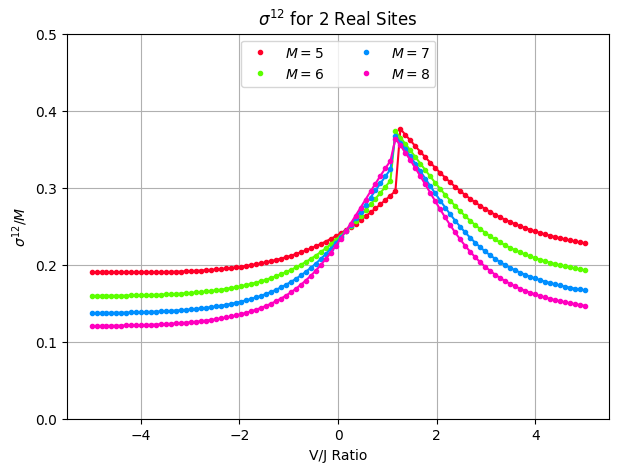

In [2]:
N = 2
Ms = [5,6,7,8]
J = 1
V_J_ratios = np.linspace(-5,5,100)

# for sigma^01
i = 0
j = 1

fig, ax = plt.subplots(figsize = (7,5))
cmap = get_cmap("gist_rainbow", len(Ms))

for idx, M in enumerate(Ms):
    sigmas = []
        
    for V_J_ratio in V_J_ratios:
        V = V_J_ratio*J
        
        H = construct_hamiltonian(N,M,J,V)
        
        states, _ = enumerate_states(N,M)
        
        eigenvalues, eigenvectors = exact_diagonalize(H)
    
        sigmas += [sigma_ij(i=i, j=j, ground_state_wavefunction=eigenvectors[0], states = states, N=N, M=M)/M]
                            
    ax.plot(V_J_ratios, sigmas, ".", color = cmap(idx), label = f"$M=${M}")
    ax.plot(V_J_ratios, sigmas, "-", color = cmap(idx))

ax.set_title("$\sigma^{12}$ for "+ f"{N} Real Sites")
ax.set_xlabel("V/J Ratio")
ax.set_ylabel("$\sigma^{12}/M$")
ax.grid()
ax.legend(loc="upper center", ncols=len(Ms)/2, fancybox=True)
ax.set_ylim(0,0.5)

C:\Users\jwdes\AppData\Local\Temp\ipykernel_27144\1709136815.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("gist_rainbow", len(Ms))


(0.0, 0.5)

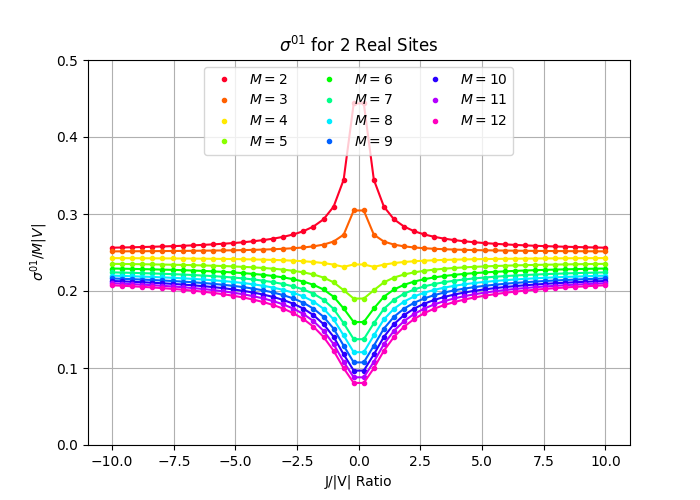

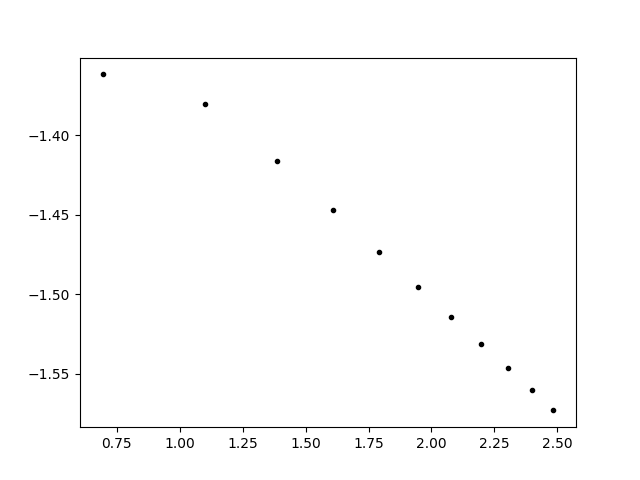

In [17]:
N = 2
Ms = [2,3,4,5,6,7,8,9,10,11,12]
V = -1
J_V_ratios = np.linspace(-10,10,50)

# for sigma^01
i = 0
j = 1

fig, ax = plt.subplots(figsize = (7,5))
cmap = get_cmap("gist_rainbow", len(Ms))
fig2, ax2 = plt.subplots()

for idx, M in enumerate(Ms):
    sigmas = []
        
    for J_V_ratio in J_V_ratios:
        
        H = construct_rescaled_hamiltonian(N,M,V,mu_V_ratio=0, J_V_ratio=J_V_ratio)
        
        states, _ = enumerate_states(N,M)
        
        eigenvalues, eigenvectors = exact_diagonalize(H)
    
        sigmas += [sigma_ij(i=i, j=j, ground_state_wavefunction=eigenvectors[0], states = states, N=N, M=M)/M]
                            
    ax.plot(J_V_ratios, sigmas, ".", color = cmap(idx), label = f"$M=${M}")
    ax.plot(J_V_ratios, sigmas, "-", color = cmap(idx))
    
    ax2.plot(np.log(M), np.log(sigmas[-1]), '.k' )



ax.set_title("$\sigma^{01}$ for "+ f"{N} Real Sites")
ax.set_xlabel("J/|V| Ratio")
ax.set_ylabel("$\sigma^{01}/M|V|$")
ax.grid()
ax.legend(loc="upper center", ncols=len(Ms)/3, fancybox=True)
ax.set_ylim(0,0.5)